In [2]:
%cd
!pip install opencv-python

import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("画像処理100/imori.jpg")

%whos

/home/jovyan
Variable   Type       Data/Info
-------------------------------
cv2        module     <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
img        ndarray    128x128x3: 49152 elems, type `uint8`, 49152 bytes
np         module     <module 'numpy' from '/op<...>kages/numpy/__init__.py'>
plt        module     <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>


In [11]:
# rgb -> hvs
max_v = np.max(img, axis=2)
min_v = np.min(img, axis=2)
min_a = np.argmin(img, axis=2)

V = max_v
S = max_v - min_v
H = np.zeros_like(max_v)
H[np.where(max_v == min_v)] = 0

idx = np.where(min_a == 0)
H[idx] = 60 * (img[..., 1][idx] - img[..., 2][idx]) / (max_v[idx] - min_v[idx]) + 60

idx = np.where(min_a == 2)
H[idx] = 60 * (img[..., 0][idx] - img[..., 1][idx]) / (max_v[idx] - min_v[idx]) + 180

idx = np.where(min_a == 1)
H[idx] = 60 * (img[..., 2][idx] - img[..., 0][idx]) / (max_v[idx] - min_v[idx]) + 300

# transpose hue
H = (H + 180) % 360

C = S
H_ = H / 60
X = C * (1 - np.abs( H_ % 2 - 1))
Z = np.zeros_like(H)

vals = [[Z,X,C], [Z,C,X], [X,C,Z], [C,X,Z], [C,Z,X], [X,Z,C]]

img2 = np.zeros_like(img)    
for i in range(6):
    ind = np.where((i <= H_) & (H_ < (i+1)))
    img2[..., 0][ind] = (V-C)[ind] + vals[i][0][ind]
    img2[..., 1][ind] = (V-C)[ind] + vals[i][1][ind]
    img2[..., 2][ind] = (V-C)[ind] + vals[i][2][ind]

img2[np.where(max_v == min_v)] = 0
img2 = (img2 * 255).astype(np.uint8)

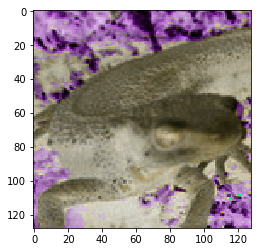

In [12]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))